In [15]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

In [16]:
# ENGLISH
df= pd.read_pickle(r"C:\Users\Konstantin\Documents\OB1-reader-model\results\results_EmbeddedWords.pkl")
df=pd.DataFrame(df)
df.columns

# GERMAN
# df= pd.read_pickle(r"C:\Users\Konstantin\Documents\OB1-reader-model\results\results_EmbeddedWords_German.pkl")
# df=pd.DataFrame(df)
# df.columns


Index(['stimulus', 'prime', 'target', 'condition', 'cycle',
       'lexicon activity per cycle', 'lexicon activity squared',
       'stimulus activity per cycle', 'target activity per cycle',
       'bigram activity per cycle', 'top 10 bigrams', 'bigrams ordered',
       'unit activations unordered', 'ngrams',
       'exact recognized words positions', 'exact recognized words',
       'eye position', 'attention position', 'word threshold',
       'word frequency', 'word predictability', 'reaction time', 'correct',
       'POS', 'position', 'inhibition_value', 'wordlen_threshold',
       'target_inhib', 'error_rate', 'item_nr'],
      dtype='object')

In [17]:
df['word frequency']

0       
1       
2       
3       
4       
      ..
127     
128     
129     
130     
131     
Name: word frequency, Length: 132, dtype: object

In [18]:
df.tail(1)['target_inhib'].values[0]

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([-0.00039667]),
 array([-0.00181462]),
 array([-0.00272841]),
 array([-0.00288589]),
 array([-0.00283362]),
 array([-0.00273149]),
 array([-0.00265828]),
 array([-0.00260086]),
 array([-0.00255036]),
 array([-0.0025107]),
 array([-0.00248485]),
 array([-0.0024685]),
 array([-0.00246118]),
 array([-0.00243968]),
 array([-0.00240605]),
 array([-0.00237054]),
 array([-0.00233059]),
 array([-0.00228996]),
 array([-0.00225439]),
 array([-0.00224498]),
 array([-0.00223354]),
 array([-0.00222103]),
 array([-0.00220808]),
 array([-0.0021951]),
 array([-0.00218245]),
 array([-0.00217012]),
 array([-0.0021582]),
 array([-0.00214673]),
 array([-0.00213586]),
 array([-0.00212588]),
 array([-0.00211659]),
 array([-0.00210795]),
 array([-0.00209996]),
 array([-0.00209258]),
 array([-0.00208577]),
 array([-0.0020795]),
 array([-0.00207374]),
 array([-0.00206857]),
 array([-0.00206383]),
 array([-0.00205948]),
 array([-0.0020

In [19]:
df2plot=df.copy(deep=True)
df2plot['suffixed']=df['condition'].str.split('/').str[0] #NV: Add new column with suffix / non suffix and extract info from condition
df2plot['condition']=df['condition'].str.split('/').str[1]#NV: and replace condition with only the actual condition

df2plot['RT']=df2plot['reaction time'].str[0]
df2plot['corr'] = df2plot['correct'].str[0]

In [20]:
df2plot.tail(3)

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,suffixed,RT,corr
129,ski,dusty,ski,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.557190805263248, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.47605887753501736,...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[1.7481040927130993, 1.7481040927130993, 1.748...",...,[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000193...",0,130,non suffixed,3350,0
130,won,gloomy,won,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.675492108390529, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.47064044073559785,...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[1.7481040927130993, 1.7481040927130993, 1.748...",...,[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000243...",0,131,non suffixed,3350,0
131,cart,girdle,cart,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[1.954070291419636, 1.954070291419636, 1.95407...",...,[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000396...",0,132,non suffixed,3350,0


# RT

c:\Users\Konstantin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


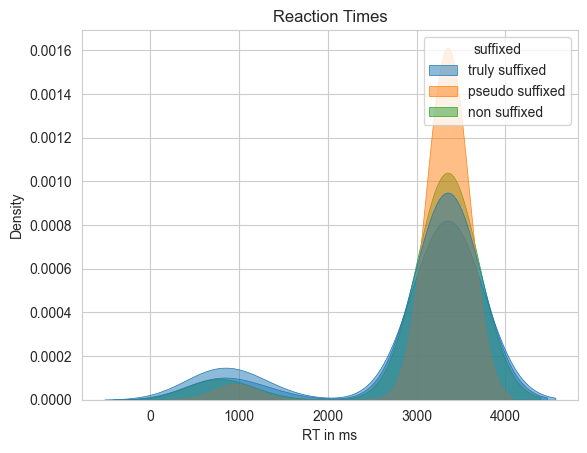

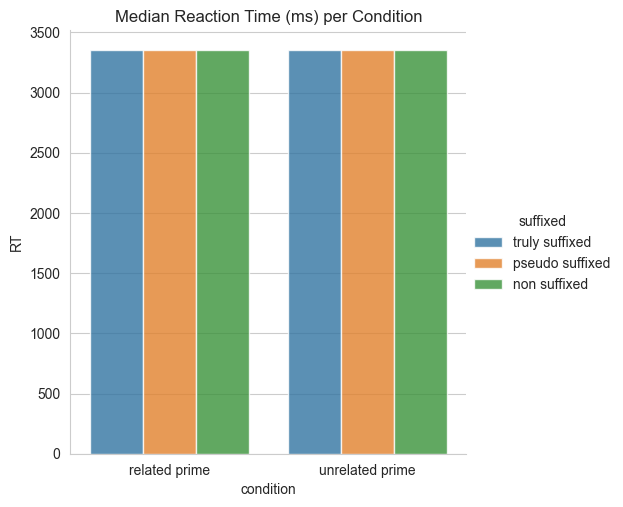

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(x='RT', hue='condition', data=df2plot, fill=True, alpha=0.5, linewidth=0.5, common_norm=False)
sns.kdeplot(x='RT', hue='suffixed', data=df2plot, fill=True, alpha=0.5, linewidth=0.5, common_norm=False)
plt.title('Reaction Times')
plt.xlabel('RT in ms')
plt.ylabel('Density')

# sns.catplot(x='condition', y='RT', data=df2plot, kind='bar', hue='suffixed', alpha=0.8)
# plt.title('Reaction time (ms) per condition')
# plt.show()

sns.catplot(x='condition', y='RT', data=df2plot, kind='bar', hue='suffixed', alpha=0.8, estimator=np.median)
plt.title('Median Reaction Time (ms) per Condition')
plt.show()

c:\Users\Konstantin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Konstantin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


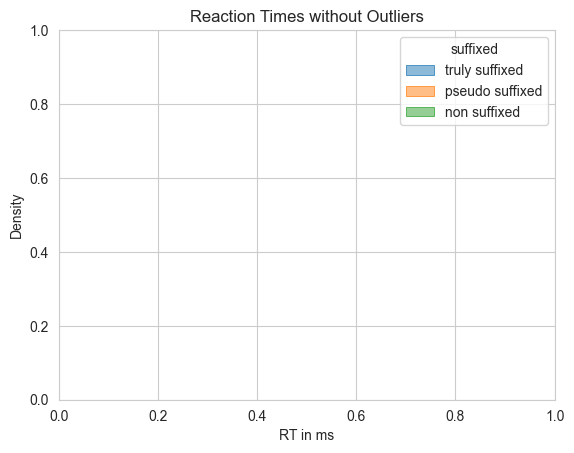

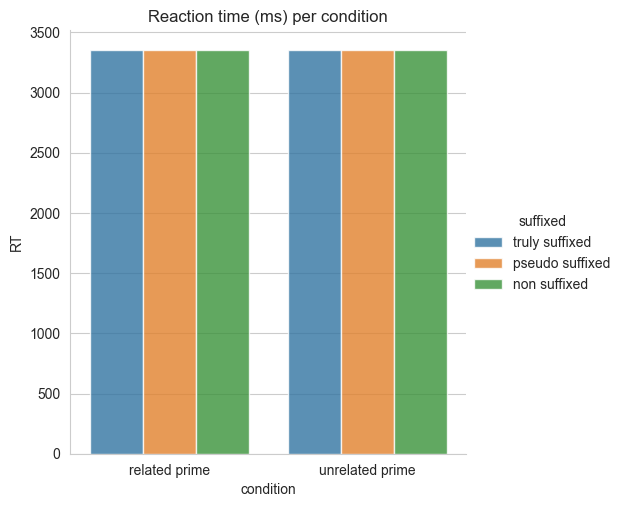

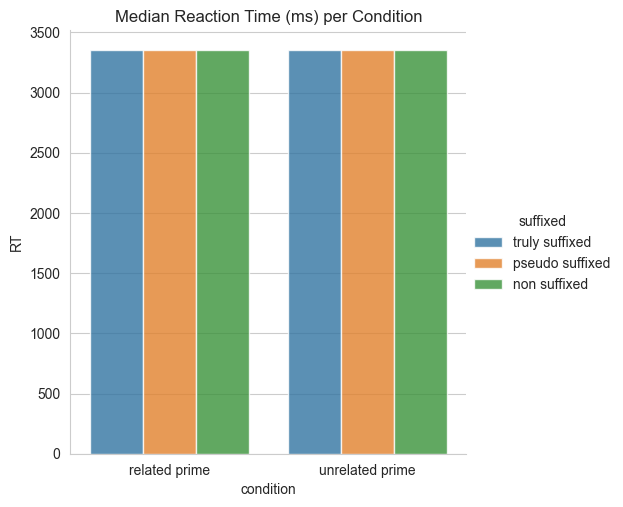

In [22]:
Q1 = df2plot['RT'].quantile(0.25)
Q3 = df2plot['RT'].quantile(0.85)
IQR = Q3 - Q1
df_no_outliers = df2plot[(df2plot['RT'] >= Q1 - 1.5 * IQR) & (df2plot['RT'] <= Q3 + 1.5 * IQR)]
sns.set_style('whitegrid')
sns.kdeplot(x='RT', hue='condition', data=df_no_outliers, fill=True, alpha=0.5, linewidth=0.5, common_norm=False)
sns.kdeplot(x='RT', hue='suffixed', data=df_no_outliers, fill=True, alpha=0.5, linewidth=0.5, common_norm=False)
plt.title('Reaction Times without Outliers')
plt.xlabel('RT in ms')
plt.ylabel('Density')
plt.show()

sns.catplot(x='condition', y='RT', data=df_no_outliers, kind='bar', hue='suffixed', alpha=0.8)
plt.title('Reaction time (ms) per condition')
plt.show()

sns.catplot(x='condition', y='RT', data=df_no_outliers, kind='bar', hue='suffixed', alpha=0.8, estimator=np.median)
plt.title('Median Reaction Time (ms) per Condition')
plt.show()

# Correct vs Incorrect

In [23]:
correct_vals = df2plot.groupby('condition')['corr'].value_counts()
correct_suff = df2plot.groupby('suffixed')['corr'].value_counts()
correct_vals
correct_suff

suffixed         corr
non suffixed     0       40
                 1        4
pseudo suffixed  0       42
                 1        2
truly suffixed   0       39
                 1        5
Name: corr, dtype: int64

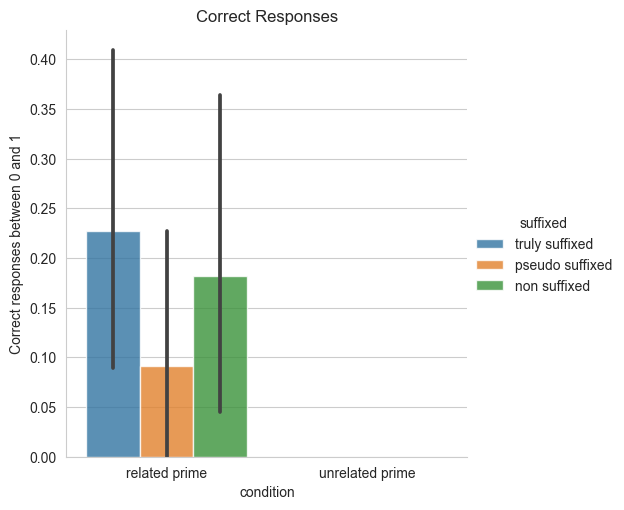

In [24]:
sns.catplot(x='condition', y='corr', data=df2plot, kind='bar', hue='suffixed', alpha=0.8)
plt.title('Correct Responses')
plt.ylabel('Correct responses between 0 and 1')
plt.show()

Text(0.03, 0.8, ' error rate:0\n inhibition value:-1.2\n wordlen similarity threshold:0.15')

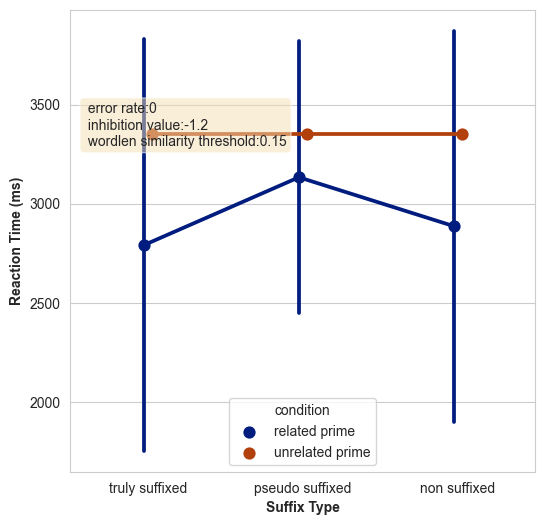

In [25]:
f, ax = plt.subplots(figsize=(6,6))

#Nv: plot reaction times per condition and per suffix

sns.pointplot(x='suffixed', y='RT', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df2plot) #NV: plot all suffix conditions separated by prime type and standard deviation of the mean
#sns.stripplot(x="suffixed", y="RT", hue='condition', data=df2plot, dodge=False, palette="dark", alpha=.8) #NV: is not so informative, actually.

ax.set_xlabel("Suffix Type",fontdict=dict(weight='bold'))
ax.set_ylabel("Reaction Time (ms)",fontdict=dict(weight='bold'))

text=' error rate:'+str(df2plot['error_rate'].iloc[-1])+'\n inhibition value:'+str(df2plot['inhibition_value'][1])+'\n wordlen similarity threshold:'+str(df2plot['wordlen_threshold'][1])
ax.text(0.03, 0.8, text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [26]:
#NV: plot difference in correct vs false answers.

i=df[df['correct'].str[0]==0]
#print(len(i))
#print(i)
#NV: plot target activity per cycle. Note : This is much harder here because of variable cycle lenght! ( trial ends on word recog)

target2plot = df.copy(deep=True)

#first figure out max amount of cycles per trial:
max_cycles=0 # creates a variable max_cycles and sets it to 0.
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target activity per cycle']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target activity per cycle']=np.pad(np.hstack(target2plot.iloc[i]['target activity per cycle']), (0,max_cycles-len(target2plot.iloc[i]['target activity per cycle'])), mode='constant')

    
target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

#len(target2plot.tail(1)['cycle'])

127


# Target Activity per cycle

In [27]:
df2plot['target activity per cycle']

0      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.1804381...
1      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.1739284...
2      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.1686108...
3      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.1621354...
4      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.1808597...
                             ...                        
127    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
128    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
129    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
130    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
131    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Name: target activity per cycle, Length: 132, dtype: object

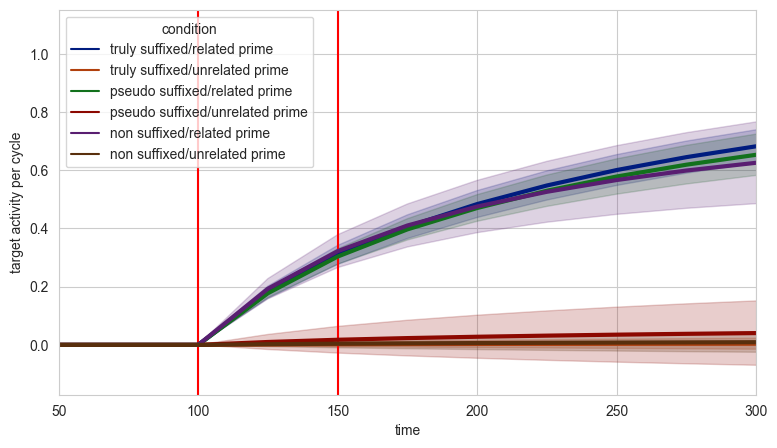

In [28]:
# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)


ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

sns.lineplot(ax=ax, data=target2plot, x="time", y="target activity per cycle", hue = "condition",palette='dark' , ci='sd',  linewidth=3)


plt.show()

In [29]:
target2plot = df.copy(deep=True)

In [30]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target_inhib']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target_inhib']=np.pad(np.hstack(target2plot.iloc[i]['target_inhib']), (0,max_cycles-len(target2plot.iloc[i]['target_inhib'])), mode='constant')

    
target2plot = target2plot.explode('target_inhib')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

len(target2plot.tail(1)['cycle'])

127


1

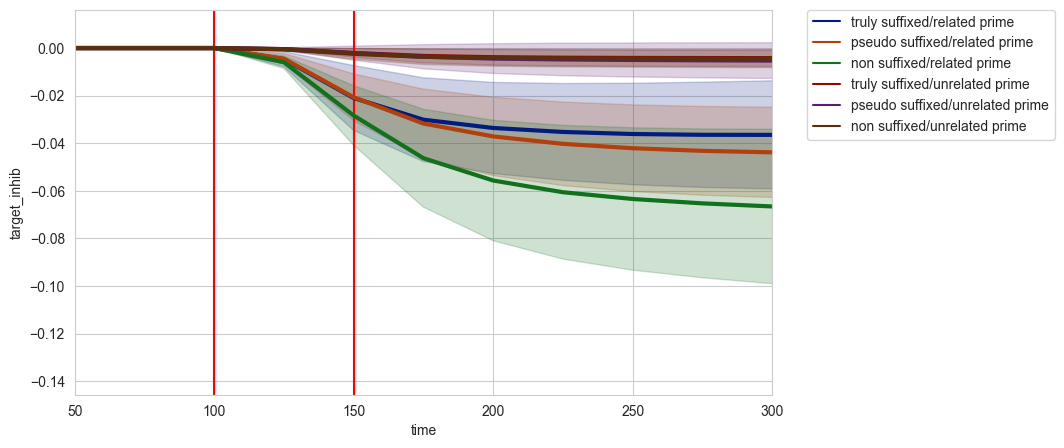

In [31]:
# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)

ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

hue_order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.lineplot(ax=ax, data=target2plot, x="time", y="target_inhib", hue = "condition",palette='dark' , ci='sd',  linewidth=3, 
            hue_order = hue_order)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [32]:
target2plot.tail(5)

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
16759,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.002015,0,132,122,3050
16760,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.002015,0,132,123,3075
16761,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.002015,0,132,124,3100
16762,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.002015,0,132,125,3125
16763,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.014839450177085, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.751758264377069, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.002015,0,132,126,3150


In [33]:
target2plot
target2plot_inhibcycle = target2plot[target2plot['cycle nr'] == 6]
target2plot_inhibcycle

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
6,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.892786094281796, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.924077545736392, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1804381...",...,[0],[],[],-1.2,0.15,-0.019579,0,1,6,150
133,1,tight,tighten,tight,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 16.540043236583294, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8904114456059007, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1739284...",...,[1],[],[],-1.2,0.15,-0.020355,0,2,6,150
260,2,box,boxer,box,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 12.536701128231007, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.7287853310891298, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1686108...",...,[0],[],[],-1.2,0.15,-0.00643,0,3,6,150
387,3,own,owner,own,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 17.609746502478963, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0052341280383124, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1621354...",...,[0],[],[],-1.2,0.15,-0.026733,0,4,6,150
514,4,farm,farmer,farm,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 14.967220092265427, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.878916931116839, 2...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1808597...",...,[0],[],[],-1.2,0.15,-0.018099,0,5,6,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,127,too,beefy,too,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.735439162047284, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.6504388478952909, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.000456,0,128,6,150
16262,128,beg,griped,beg,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.798669300621029, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.4625724966661885, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.001659,0,129,6,150
16389,129,ski,dusty,ski,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.557190805263248, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.47605887753501736,...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.000955,0,130,6,150
16516,130,won,gloomy,won,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.675492108390529, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.47064044073559785,...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,[0],[],[],-1.2,0.15,-0.001189,0,131,6,150


# Target inhibition

In [34]:
df2plot['target_inhib']

0      [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.004139...
1      [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.004731...
2      [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.001317...
3      [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.006298...
4      [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.003815...
                             ...                        
127    [[0.0], [0.0], [0.0], [0.0], [0.0], [-9.361712...
128    [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000333...
129    [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000193...
130    [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000243...
131    [[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000396...
Name: target_inhib, Length: 132, dtype: object

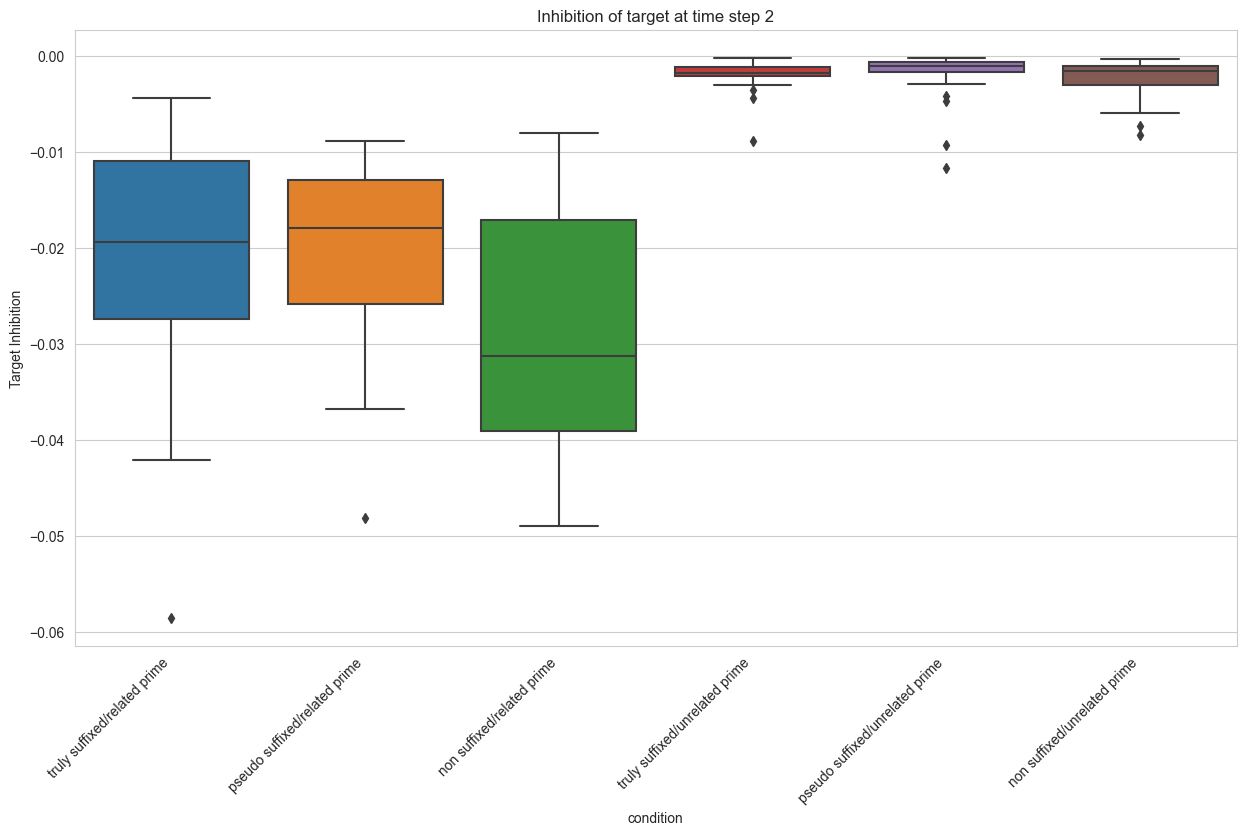

In [35]:
f, ax = plt.subplots(figsize=(15,8))

order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.boxplot(ax = ax, x = 'condition', y = 'target_inhib', data = target2plot_inhibcycle, order = order)
plt.xticks(rotation=45, ha='right')
plt.title('Inhibition of target at time step 2')
plt.ylabel('Target Inhibition')
plt.show()

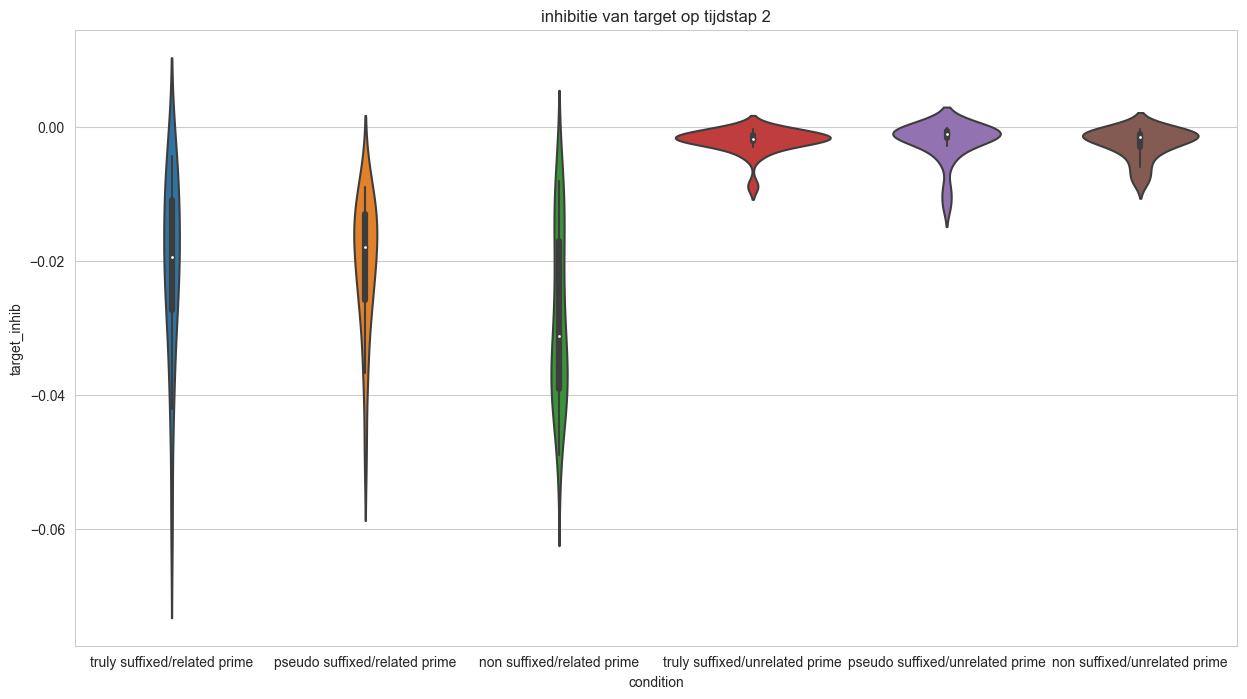

In [36]:
f, ax = plt.subplots(figsize=(15,8))

fix = pd.DataFrame(target2plot_inhibcycle.to_dict())

sns.violinplot(ax = ax, x = 'condition', y = 'target_inhib', data = fix, order = order)
plt.title('inhibitie van target op tijdstap 2')
plt.show()

In [37]:
target2plot[target2plot['condition'] == 'non suffixed/related prime']

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
11176,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.804472474105664, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.556626127891036, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1751850...",...,[0],[],[],-1.2,0.15,0.0,0,89,0,0
11177,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.804472474105664, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.556626127891036, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1751850...",...,[0],[],[],-1.2,0.15,0.0,0,89,1,25
11178,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.804472474105664, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.556626127891036, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1751850...",...,[0],[],[],-1.2,0.15,0.0,0,89,2,50
11179,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.804472474105664, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.556626127891036, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1751850...",...,[0],[],[],-1.2,0.15,0.0,0,89,3,75
11180,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.804472474105664, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.556626127891036, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1751850...",...,[0],[],[],-1.2,0.15,0.0,0,89,4,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13965,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.172249946910561, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8895875136245722, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1772596...",...,[1],[],[],-1.2,0.15,0.0,0,110,122,3050
13966,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.172249946910561, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8895875136245722, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1772596...",...,[1],[],[],-1.2,0.15,0.0,0,110,123,3075
13967,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.172249946910561, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8895875136245722, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1772596...",...,[1],[],[],-1.2,0.15,0.0,0,110,124,3100
13968,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.172249946910561, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8895875136245722, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1772596...",...,[1],[],[],-1.2,0.15,0.0,0,110,125,3125


In [38]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].max()]
## min inhibition

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
12071,95,gala,galaxy,gala,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.039516188156858, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.5342930808752132, ...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2005601...",...,[1],[],[],-1.2,0.15,-0.008011,0,96,6,150


In [39]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].min()]
## max inhibition

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,lexicon activity squared,stimulus activity per cycle,target activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
12833,101,wind,window,wind,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 9.828102966802906, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.624266874591982, 1...",[],"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1725299...",...,[0],[],[],-1.2,0.15,-0.048964,0,102,6,150
